In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4334 sha256=5224fba8ec1f0e70a8943075de483695b837907dd0477738ea84288a47818af4
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [3]:
import cv2
import selectivesearch
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

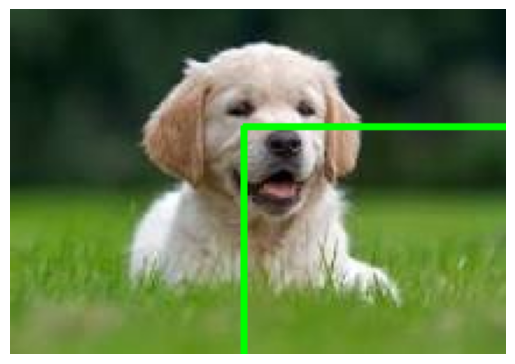

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/dog .jpeg'
image = cv2.imread(image_path)

# Define bounding box coordinates (x, y, width, height)
bounding_boxes = [
    (100, 50, 200, 150),  # Example bounding box 1
    (300, 200, 150, 100), # Example bounding box 2
    # Add more bounding boxes as needed
]

# Draw bounding boxes on the image
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf

# Load pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

def selective_search(image):
    # Initialize Selective Search
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()

    # Process and get bounding box results
    rects = ss.process()
    return rects

def predict(image):
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

    # Make prediction
    preds = model.predict(image)
    return preds

def rcnn(image):
    rects = selective_search(image)
    copy = image.copy()
    positive_boxes = []
    threshold = 0.5

    for (x, y, w, h) in rects:
        # Extract the ROI from the image
        roi = image[y:y+h, x:x+w]
        if roi.shape[0] == 0 or roi.shape[1] == 0:
            continue

        # Make prediction
        preds = predict(roi)
        class_id = np.argmax(preds, axis=-1)[0]

        # Check if class_id is within the bounds
        if class_id < preds.shape[1] and preds[0][class_id] > threshold:
            positive_boxes.append((x, y, x + w, y + h))  # Store the bounding box

    # Draw bounding boxes on the image
    for (startX, startY, endX, endY) in positive_boxes:
        cv2.rectangle(copy, (startX, startY), (endX, endY), (0, 255, 0), 2)

    return copy



14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
image_dir = '/content/image'  # Replace with your images directory
image_files = os.listdir(image_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

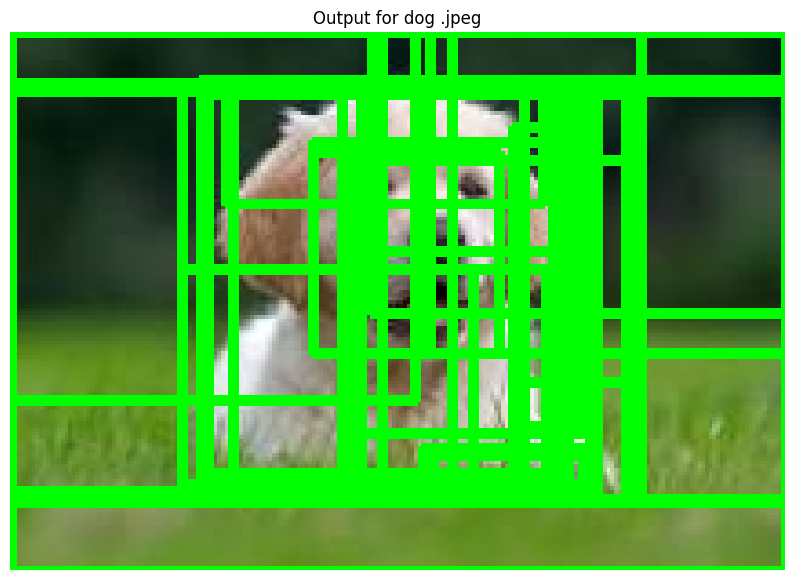

In [14]:
num_images_to_process = min(2, len(image_files))  # Set to 10 or less if fewer images are available
output_images = []

for i in range(num_images_to_process):
    image_path = os.path.join(image_dir, image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Run RCNN
    output_image = rcnn(image)
    output_images.append(output_image)

    # Display the output image
    plt.figure(figsize=(10, 10))
    plt.imshow(output_image)
    plt.axis('off')
    plt.title(f"Output for {image_files[i]}")
    plt.show()

In [10]:
image_path = '/content/dog .jpeg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

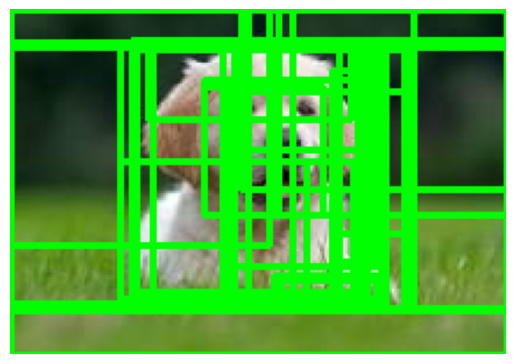

In [15]:
# Display the output image
plt.imshow(output_image)
plt.axis('off')
plt.show()